In [8]:
!pip install ultralytics --quiet

Часть 1 - классификация (обучение и результаты)

In [9]:
!pip install roboflow --quiet

In [13]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="lcXdGbuyZ8h5zrIuiEuw")
project = rf.workspace("adir-hilali").project("floor-types-object")
version = project.version(8)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.82, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to floor-types-object-8 in yolov8:: 100%|██████████| 2574/2574 [00:00<00:00, 5752.57it/s]


In [14]:
from ultralytics import YOLO

In [15]:
model = YOLO("yolov8n.pt")

100%|██████████| 6.25M/6.25M [00:00<00:00, 74.0MB/s]


In [19]:
results = model.train(data="/content/yolo_project/datasets/data.yaml", epochs=1, patience=0, plots=True, project='/content/yolo_project')

Ultralytics YOLOv8.2.82 🚀 Python-3.10.12 torch-2.4.0+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/yolo_project/datasets/data.yaml, epochs=1, time=None, patience=0, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/yolo_project, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=T

train: Scanning /content/yolo_project/datasets/floor-types-object-8/train/labels.cache... 928 images, 251 backgrounds, 0 corrupt: 100%|██████████| 928/928 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/yolo_project/datasets/floor-types-object-8/valid/labels.cache... 229 images, 57 backgrounds, 0 corrupt: 100%|██████████| 229/229 [00:00<?, ?it/s]

Plotting labels to /content/yolo_project/train4/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to /content/yolo_project/train4
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1         0G     0.7451      1.969      1.171         29        640: 100%|██████████| 58/58 [13:33<00:00, 14.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:59<00:00,  7.49s/it]


                   all        229        174      0.689      0.416      0.541      0.363

1 epochs completed in 0.246 hours.
Optimizer stripped from /content/yolo_project/train4/weights/last.pt, 6.2MB
Optimizer stripped from /content/yolo_project/train4/weights/best.pt, 6.2MB

Validating /content/yolo_project/train4/weights/best.pt...
Ultralytics YOLOv8.2.82 🚀 Python-3.10.12 torch-2.4.0+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:55<00:00,  6.92s/it]


                   all        229        174      0.688      0.417      0.543      0.364
               ceramic         84         84      0.548      0.619      0.621      0.421
               parquet         26         26      0.516      0.462      0.435      0.307
              terrazzo         64         64          1      0.171      0.572      0.363
Speed: 4.5ms preprocess, 218.1ms inference, 0.0ms loss, 5.7ms postprocess per image
Results saved to /content/yolo_project/train4


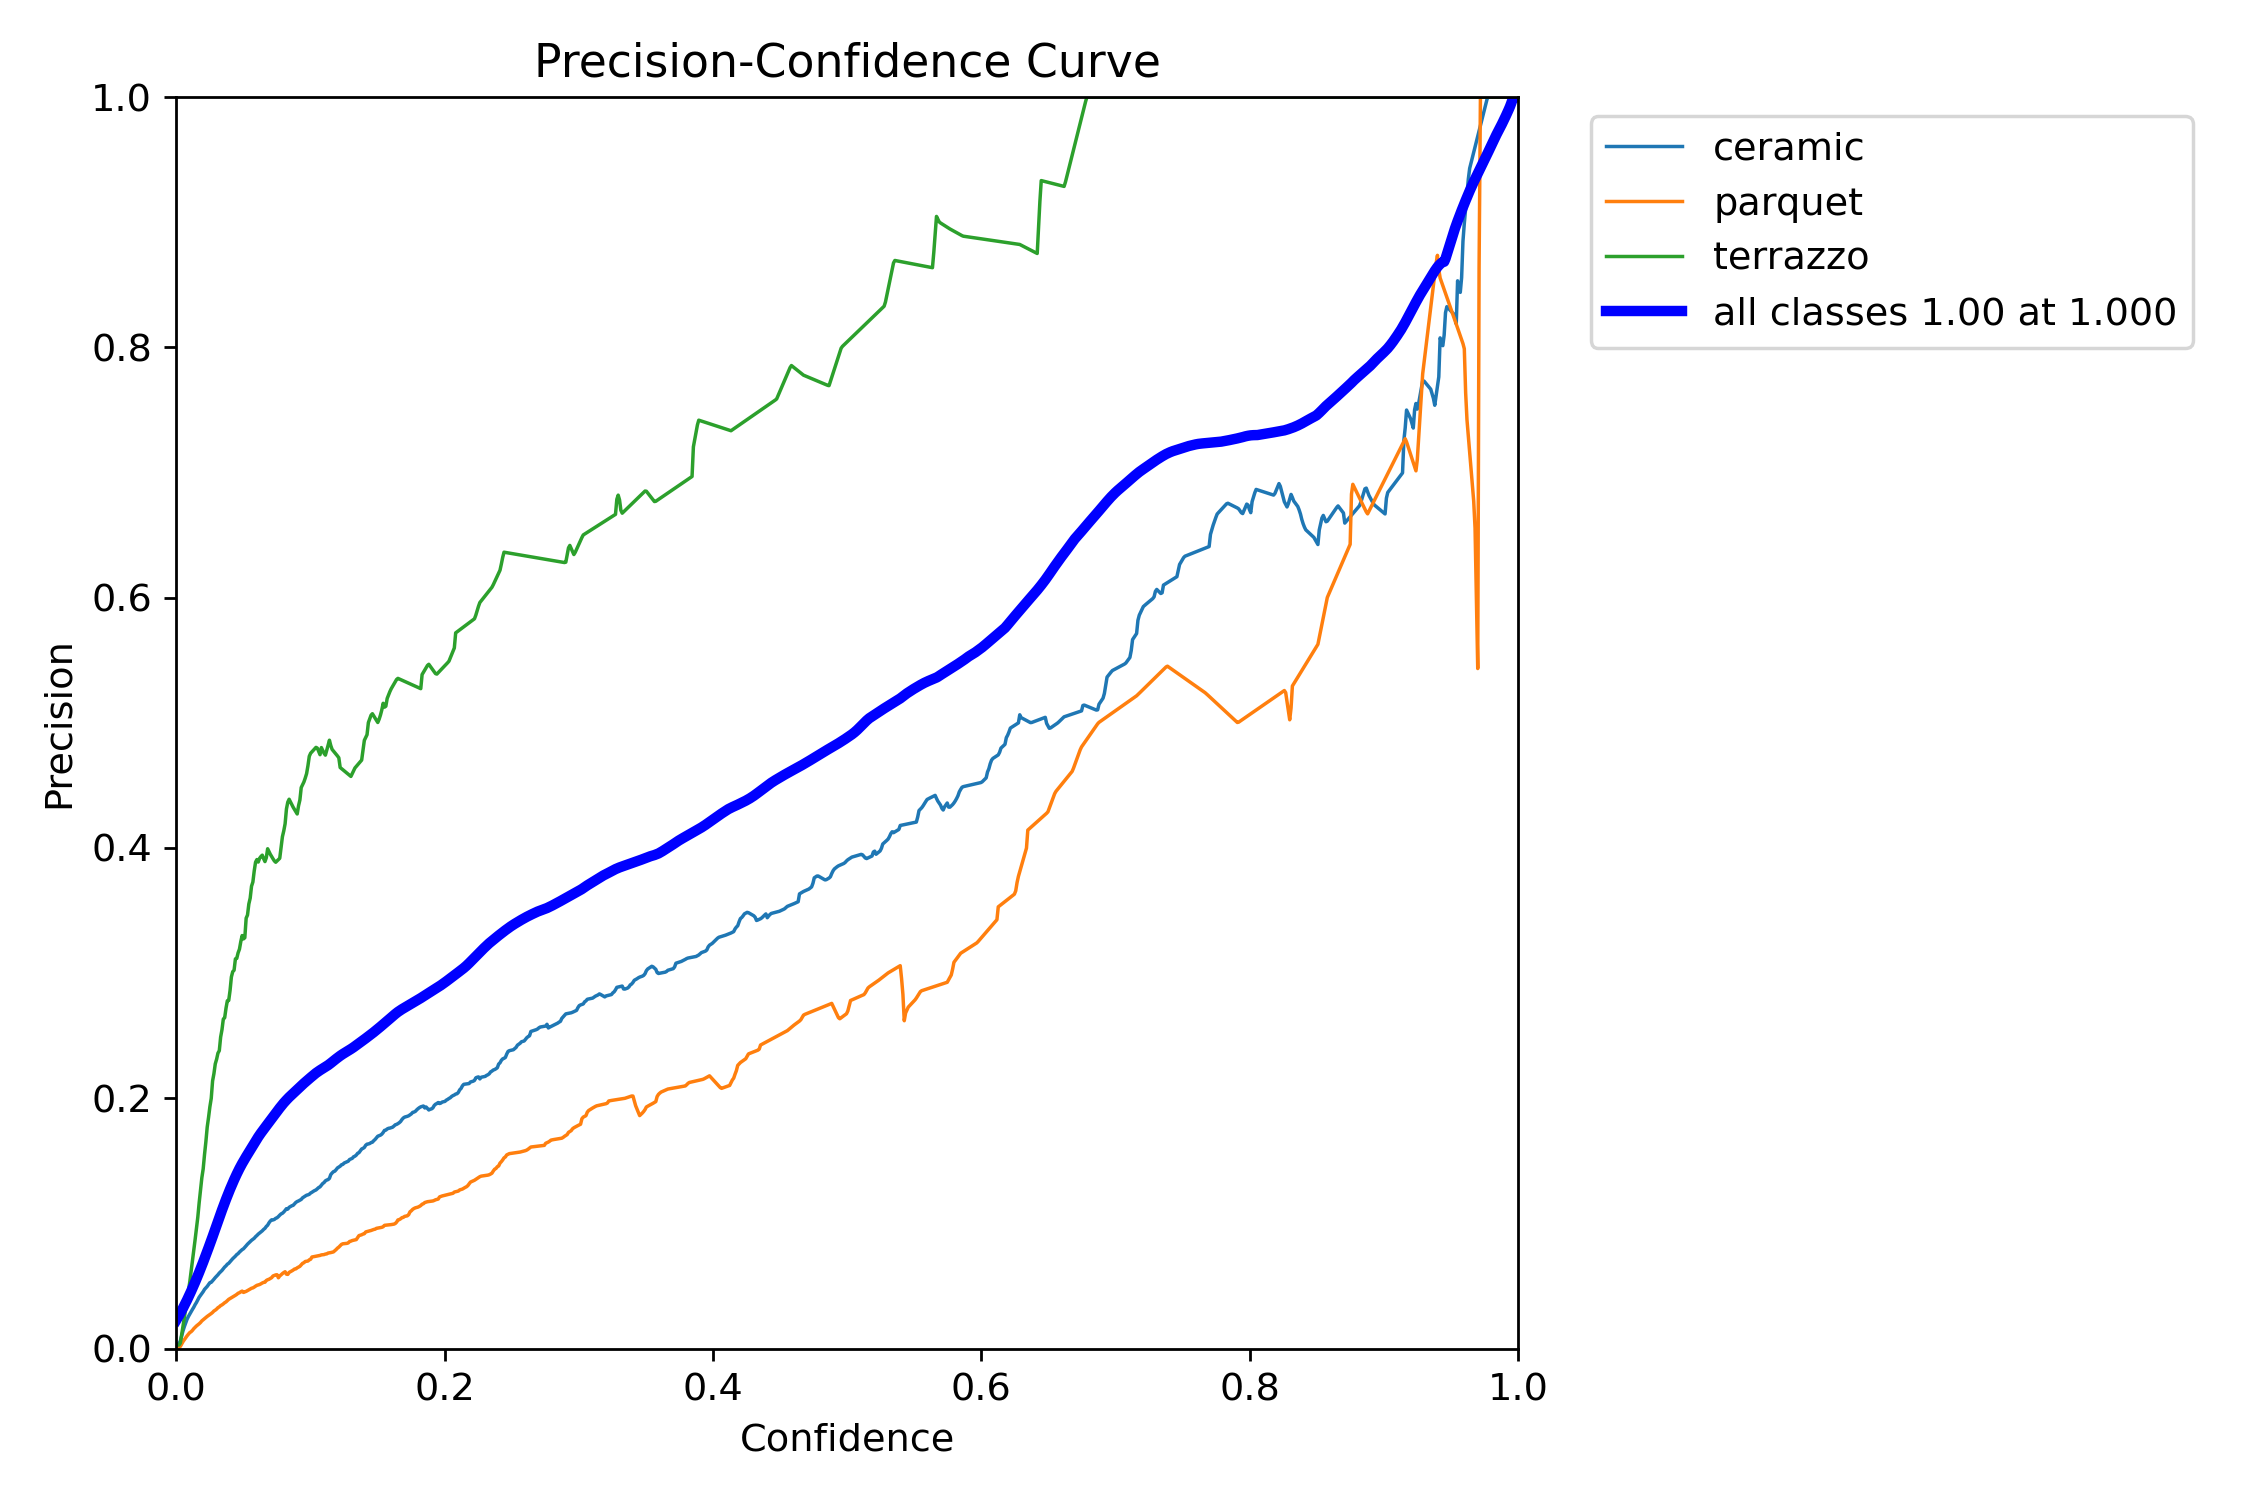

In [32]:
Image("/content/yolo_project/train4/P_curve.png")

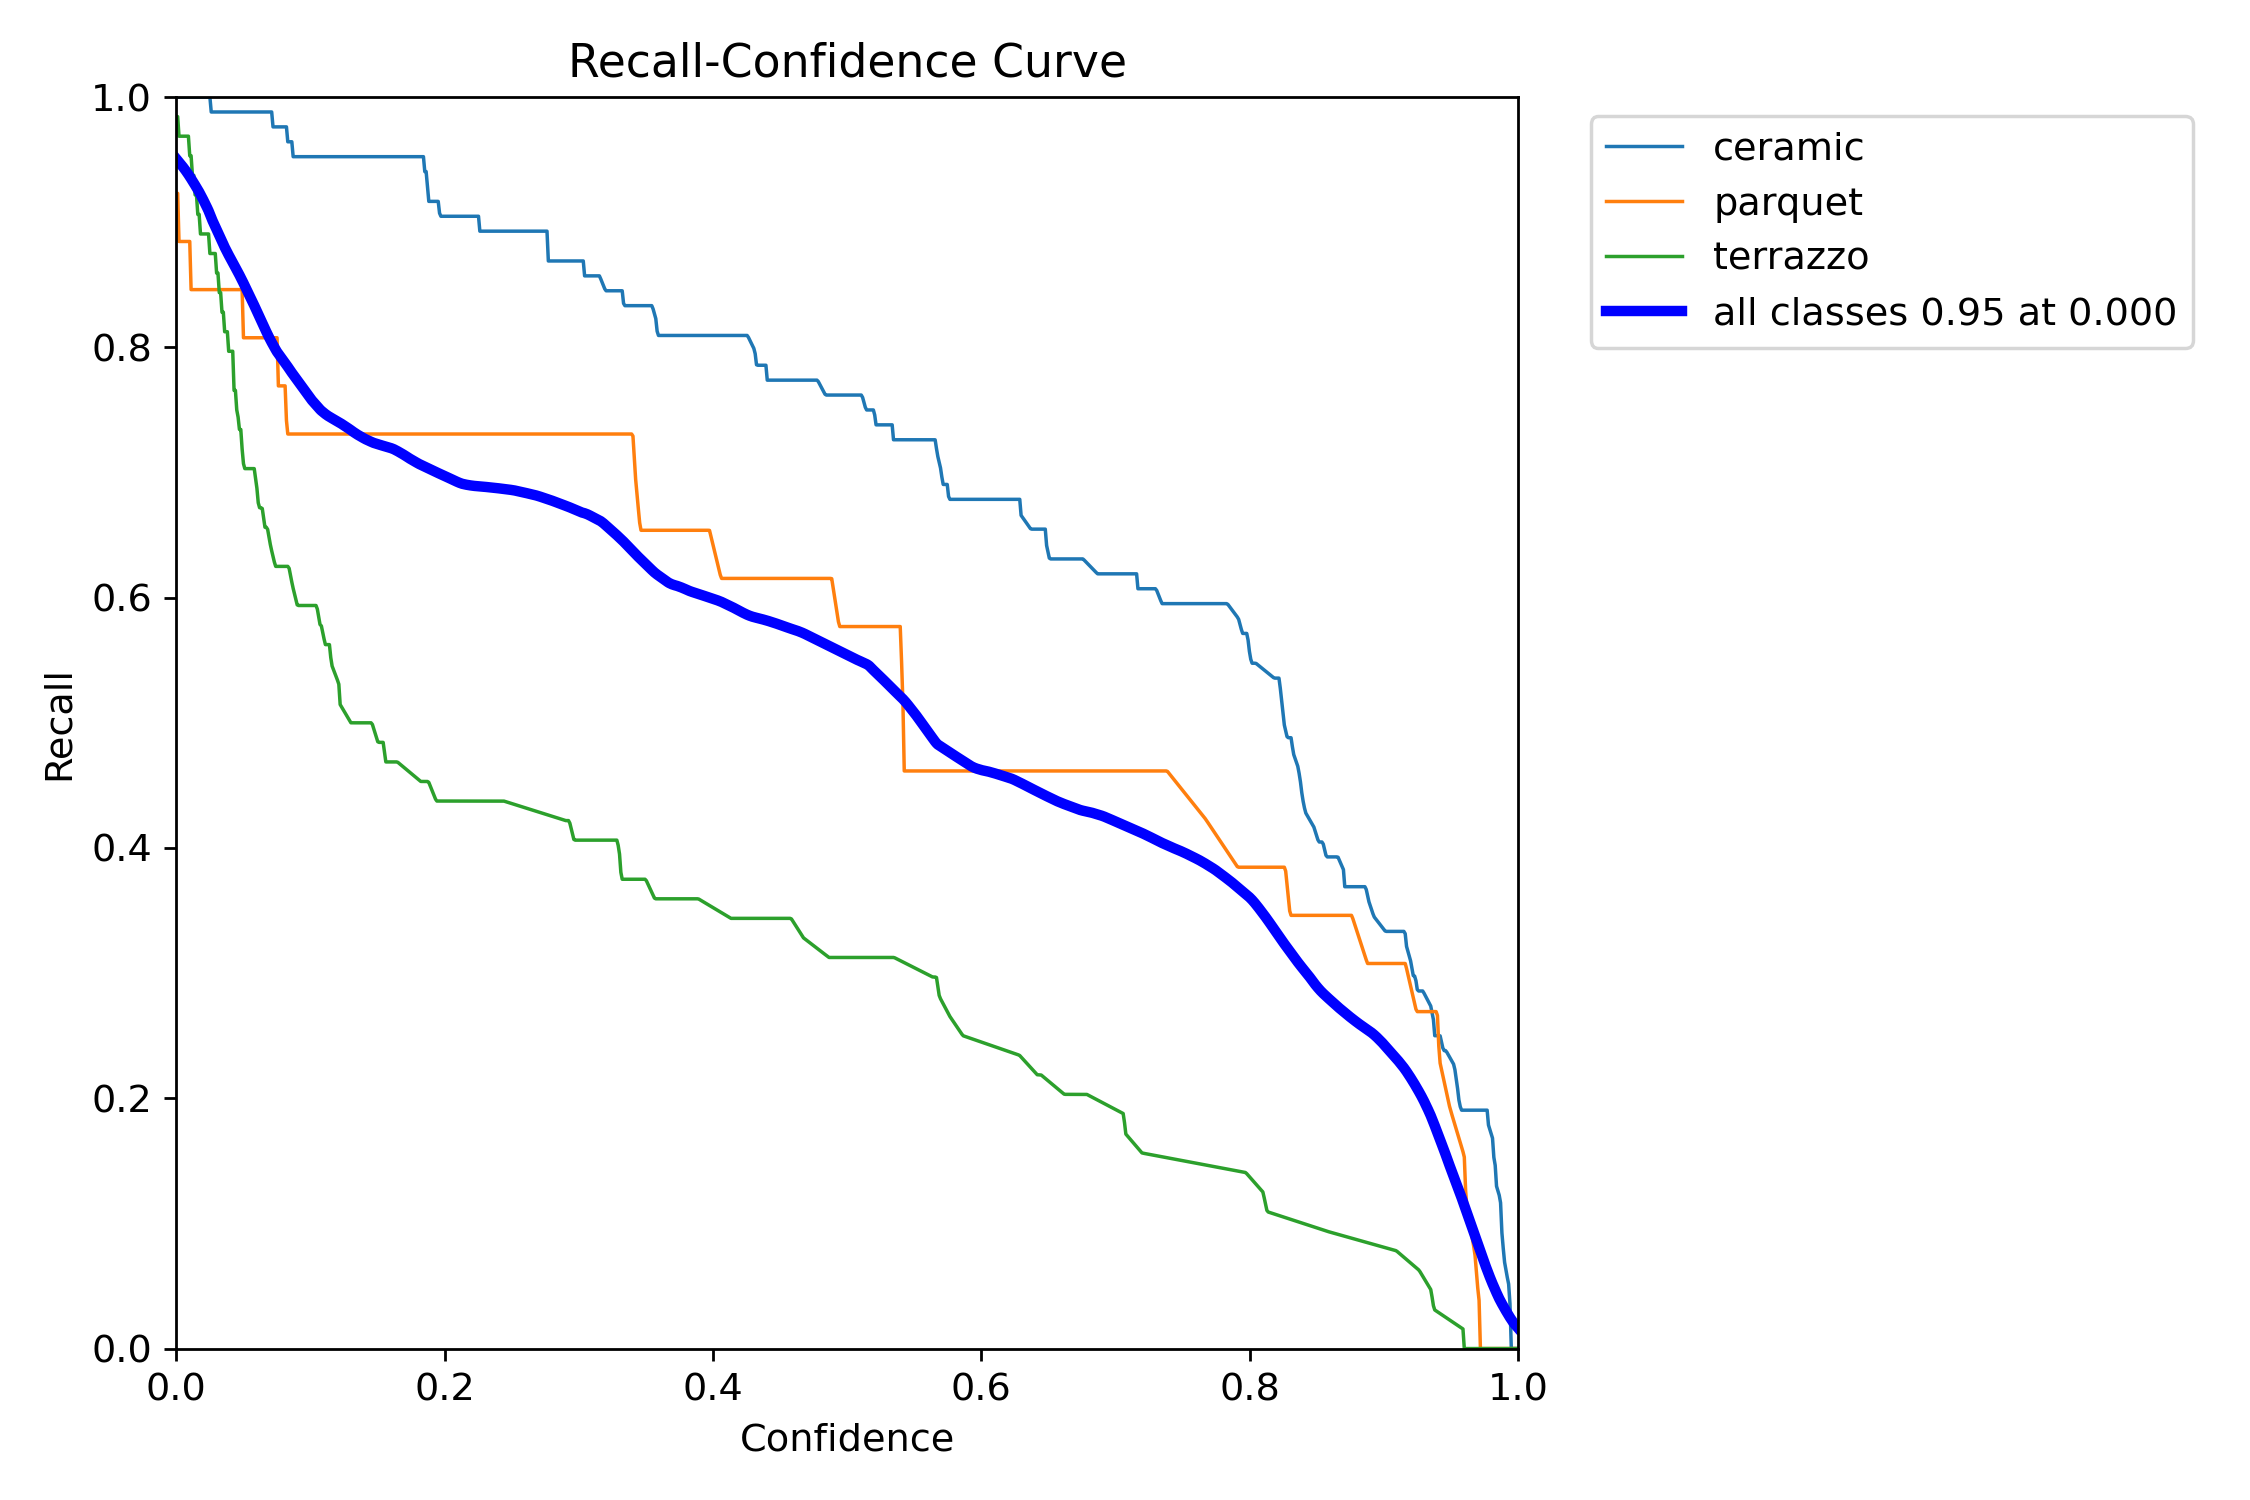

In [33]:
Image("/content/yolo_project/train4/R_curve.png")

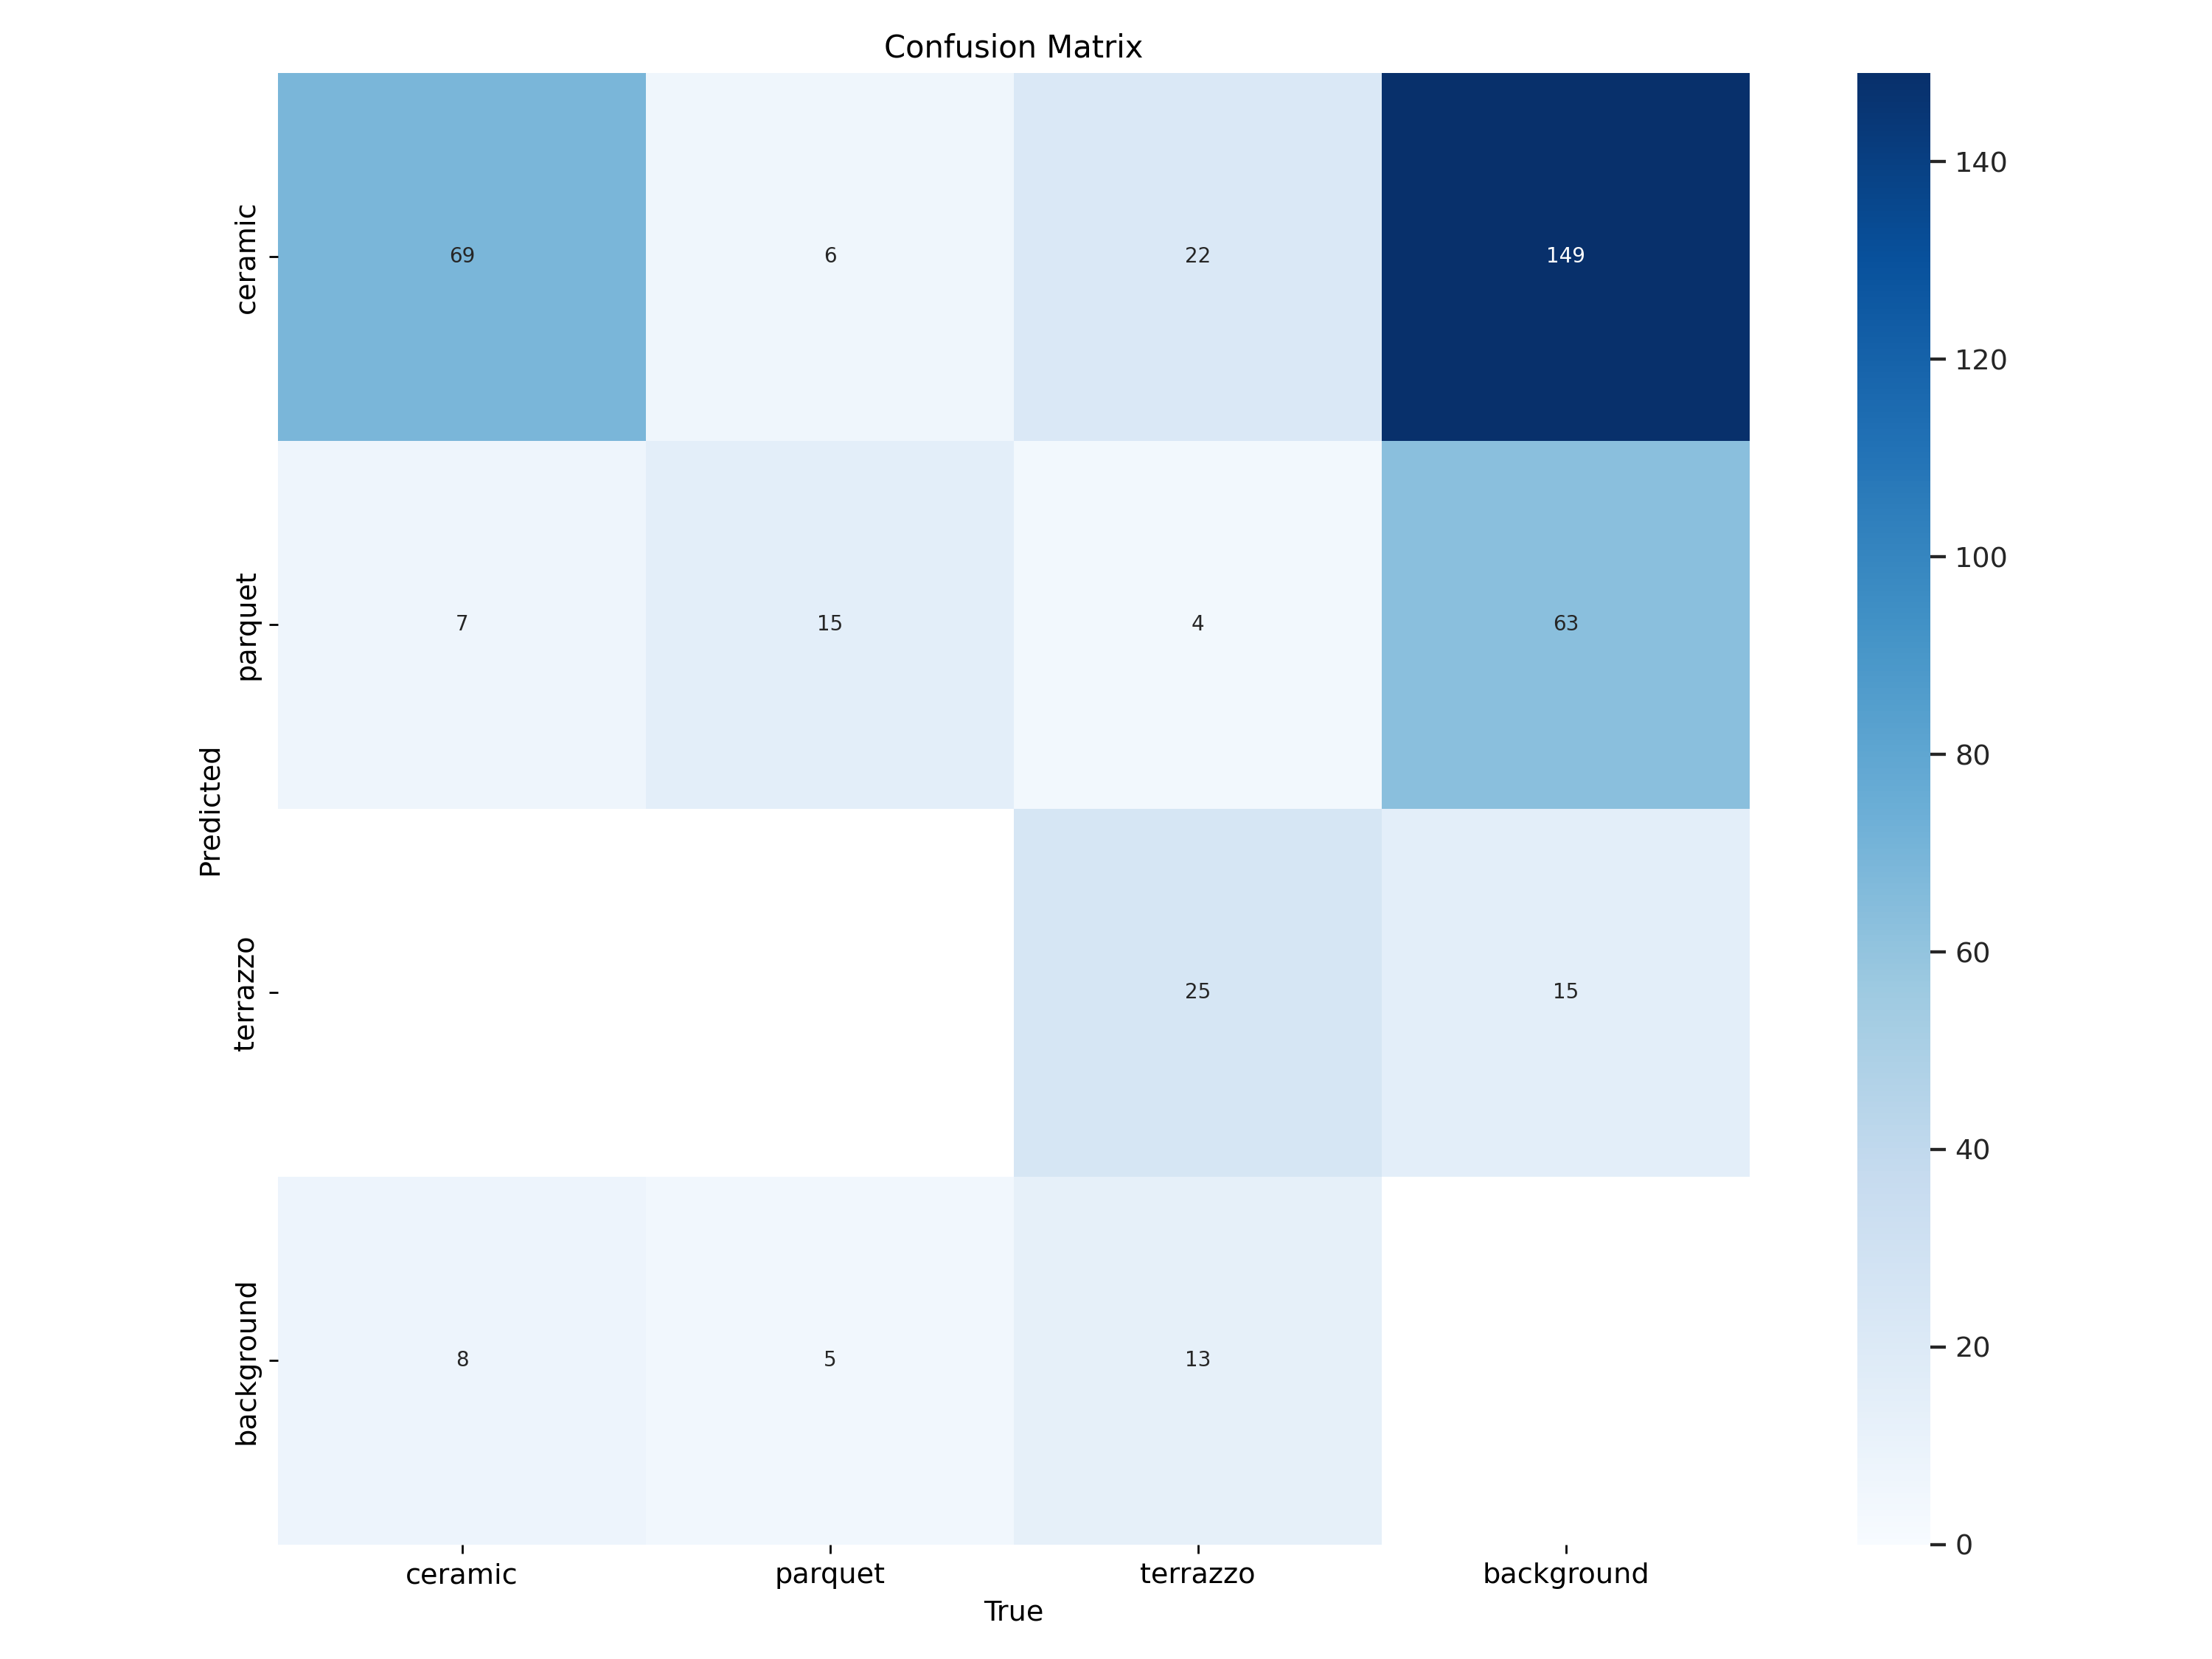

In [34]:
Image("/content/yolo_project/train4/confusion_matrix.png")

Часть 2 - Детекция

In [36]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="lcXdGbuyZ8h5zrIuiEuw")
project = rf.workspace("testing-8j1lh").project("loco_container_v1")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.82, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to loco_container_v1-1 in yolov8:: 100%|██████████| 328/328 [00:00<00:00, 4489.68it/s]


In [38]:
model = YOLO("yolov8n.pt")
model.train(data="/content/yolo_project/datasets2/data.yaml", epochs=10, patience=0,
             plots=True, project='/content/yolo_project_2')

Ultralytics YOLOv8.2.82 🚀 Python-3.10.12 torch-2.4.0+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/yolo_project/datasets2/data.yaml, epochs=10, time=None, patience=0, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/yolo_project_2, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labe

train: Scanning /content/yolo_project/datasets2/loco_container_v1-1/train/labels.cache... 138 images, 0 backgrounds, 0 corrupt: 100%|██████████| 138/138 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/yolo_project/datasets2/loco_container_v1-1/valid/labels.cache... 13 images, 0 backgrounds, 0 corrupt: 100%|██████████| 13/13 [00:00<?, ?it/s]


Plotting labels to /content/yolo_project_2/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to /content/yolo_project_2/train2
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10         0G      1.454      3.515      1.655         14        640: 100%|██████████| 9/9 [02:07<00:00, 14.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.89s/it]

                   all         13         32    0.00531       0.78      0.221       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10         0G      1.241      2.611      1.378         21        640: 100%|██████████| 9/9 [02:03<00:00, 13.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.82s/it]

                   all         13         32    0.00813       0.96      0.373      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10         0G      1.156      2.031      1.292         17        640: 100%|██████████| 9/9 [02:00<00:00, 13.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.80s/it]

                   all         13         32          1      0.115      0.354      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10         0G      1.099      1.876      1.255         24        640: 100%|██████████| 9/9 [01:59<00:00, 13.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.03s/it]

                   all         13         32          1      0.154      0.471      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10         0G      1.035      1.705      1.231         18        640: 100%|██████████| 9/9 [01:59<00:00, 13.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.82s/it]

                   all         13         32          1     0.0955      0.543       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10         0G      1.001      1.614      1.226         25        640: 100%|██████████| 9/9 [01:59<00:00, 13.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.87s/it]

                   all         13         32      0.938      0.322      0.553      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10         0G     0.9973      1.482      1.269         24        640: 100%|██████████| 9/9 [02:00<00:00, 13.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.92s/it]

                   all         13         32      0.742      0.474      0.617      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10         0G     0.9337      1.382       1.16         25        640: 100%|██████████| 9/9 [01:59<00:00, 13.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.83s/it]

                   all         13         32      0.735      0.527      0.662      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10         0G     0.8563      1.302      1.116         25        640: 100%|██████████| 9/9 [02:01<00:00, 13.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.85s/it]

                   all         13         32      0.747      0.557      0.756      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10         0G     0.8435      1.261      1.105         23        640: 100%|██████████| 9/9 [01:59<00:00, 13.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.83s/it]

                   all         13         32      0.788      0.566      0.779      0.538



10 epochs completed in 0.352 hours.
Optimizer stripped from /content/yolo_project_2/train2/weights/last.pt, 6.2MB
Optimizer stripped from /content/yolo_project_2/train2/weights/best.pt, 6.2MB

Validating /content/yolo_project_2/train2/weights/best.pt...
Ultralytics YOLOv8.2.82 🚀 Python-3.10.12 torch-2.4.0+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.94s/it]


                   all         13         32      0.788      0.566      0.779      0.538
           freight_car          7         25       0.79      0.602      0.811      0.568
            locomotive          7          7      0.785      0.529      0.748      0.508
Speed: 2.4ms preprocess, 267.7ms inference, 0.0ms loss, 24.3ms postprocess per image
Results saved to /content/yolo_project_2/train2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7981b4965900>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

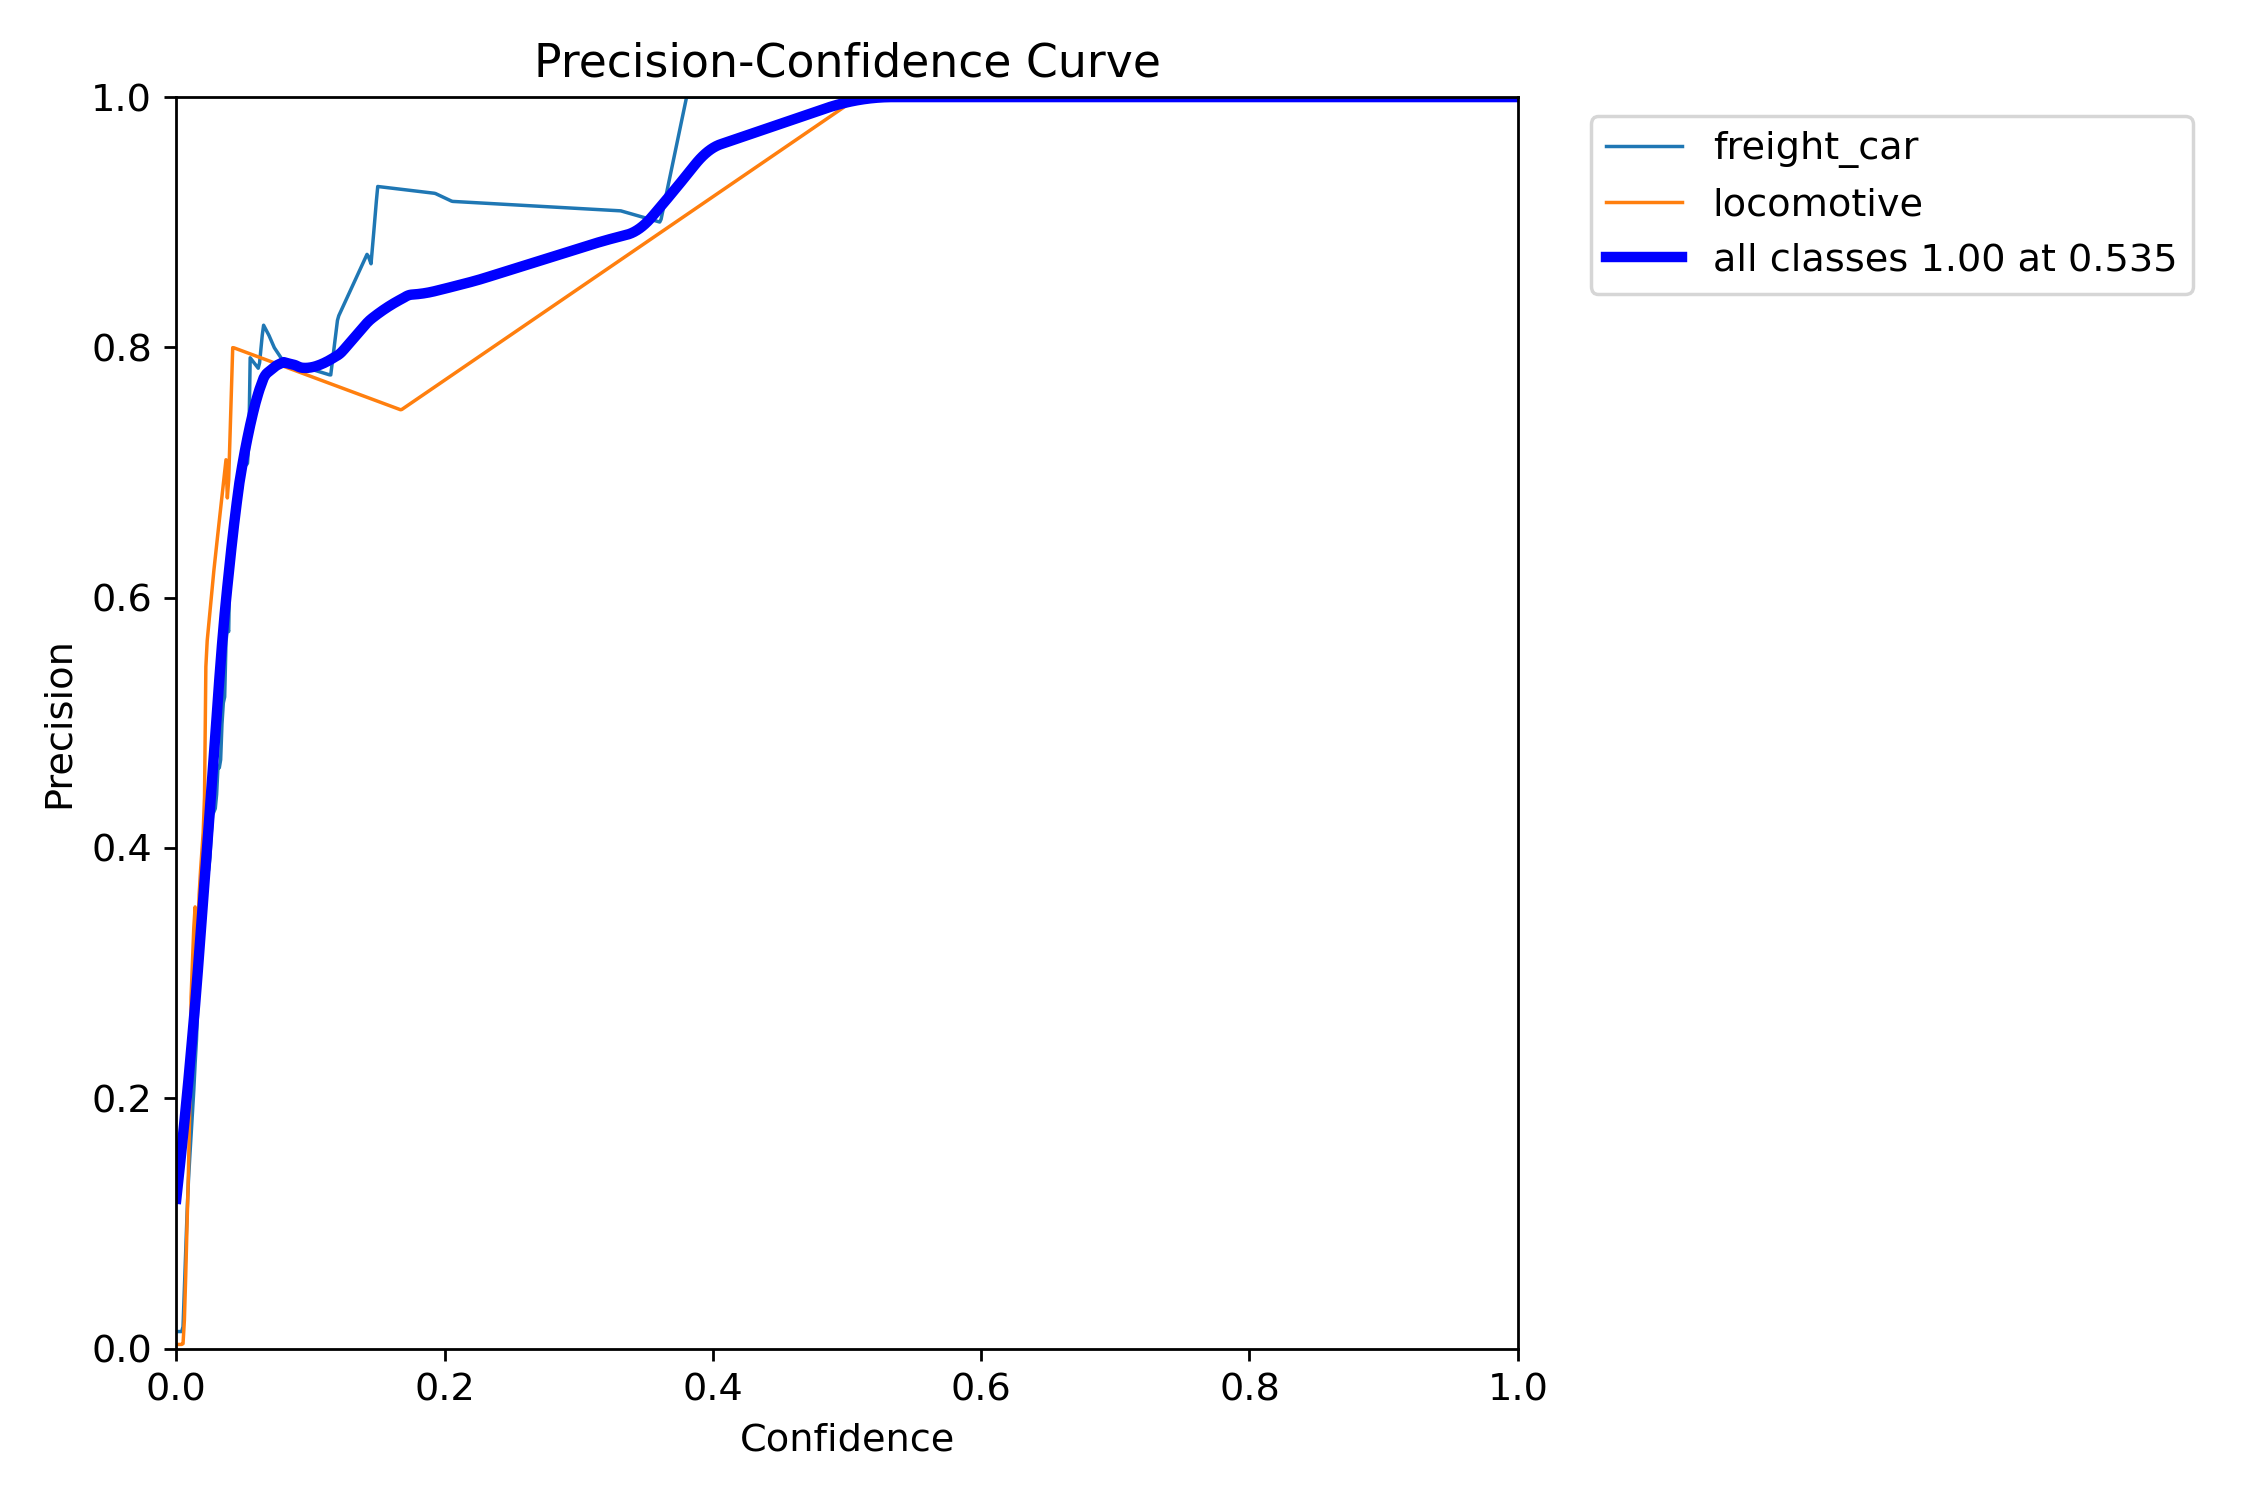

In [39]:
Image("/content/yolo_project_2/train2/P_curve.png")

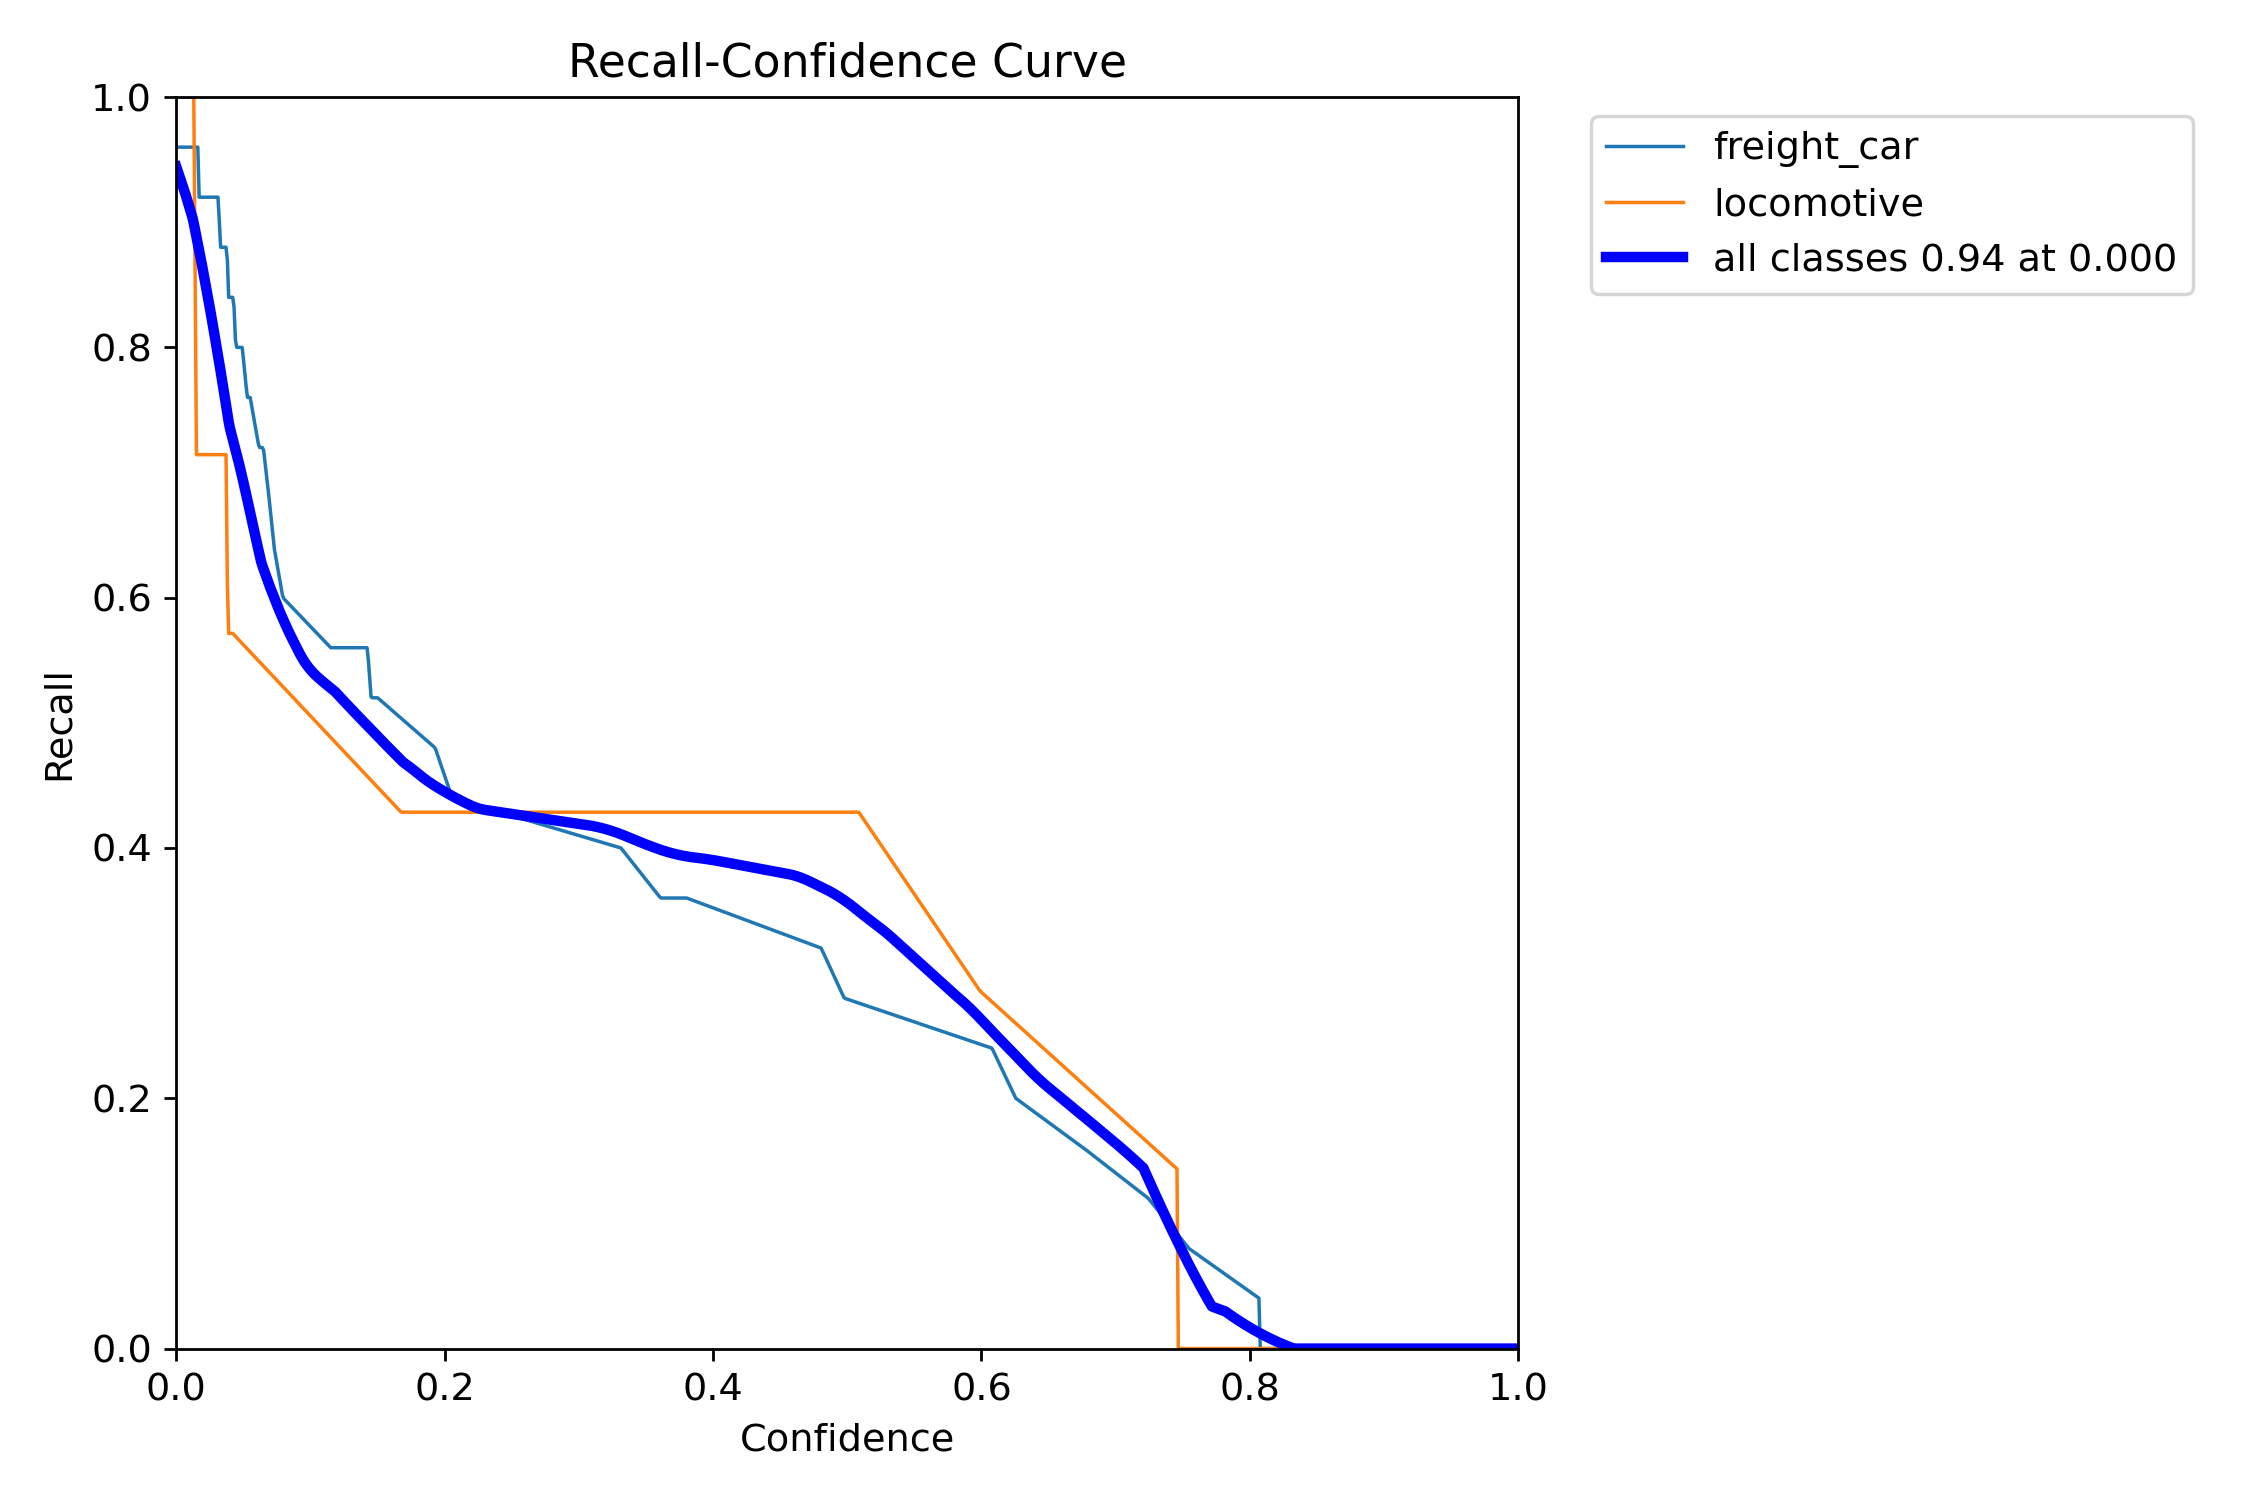

In [40]:
Image("/content/yolo_project_2/train2/R_curve.png")

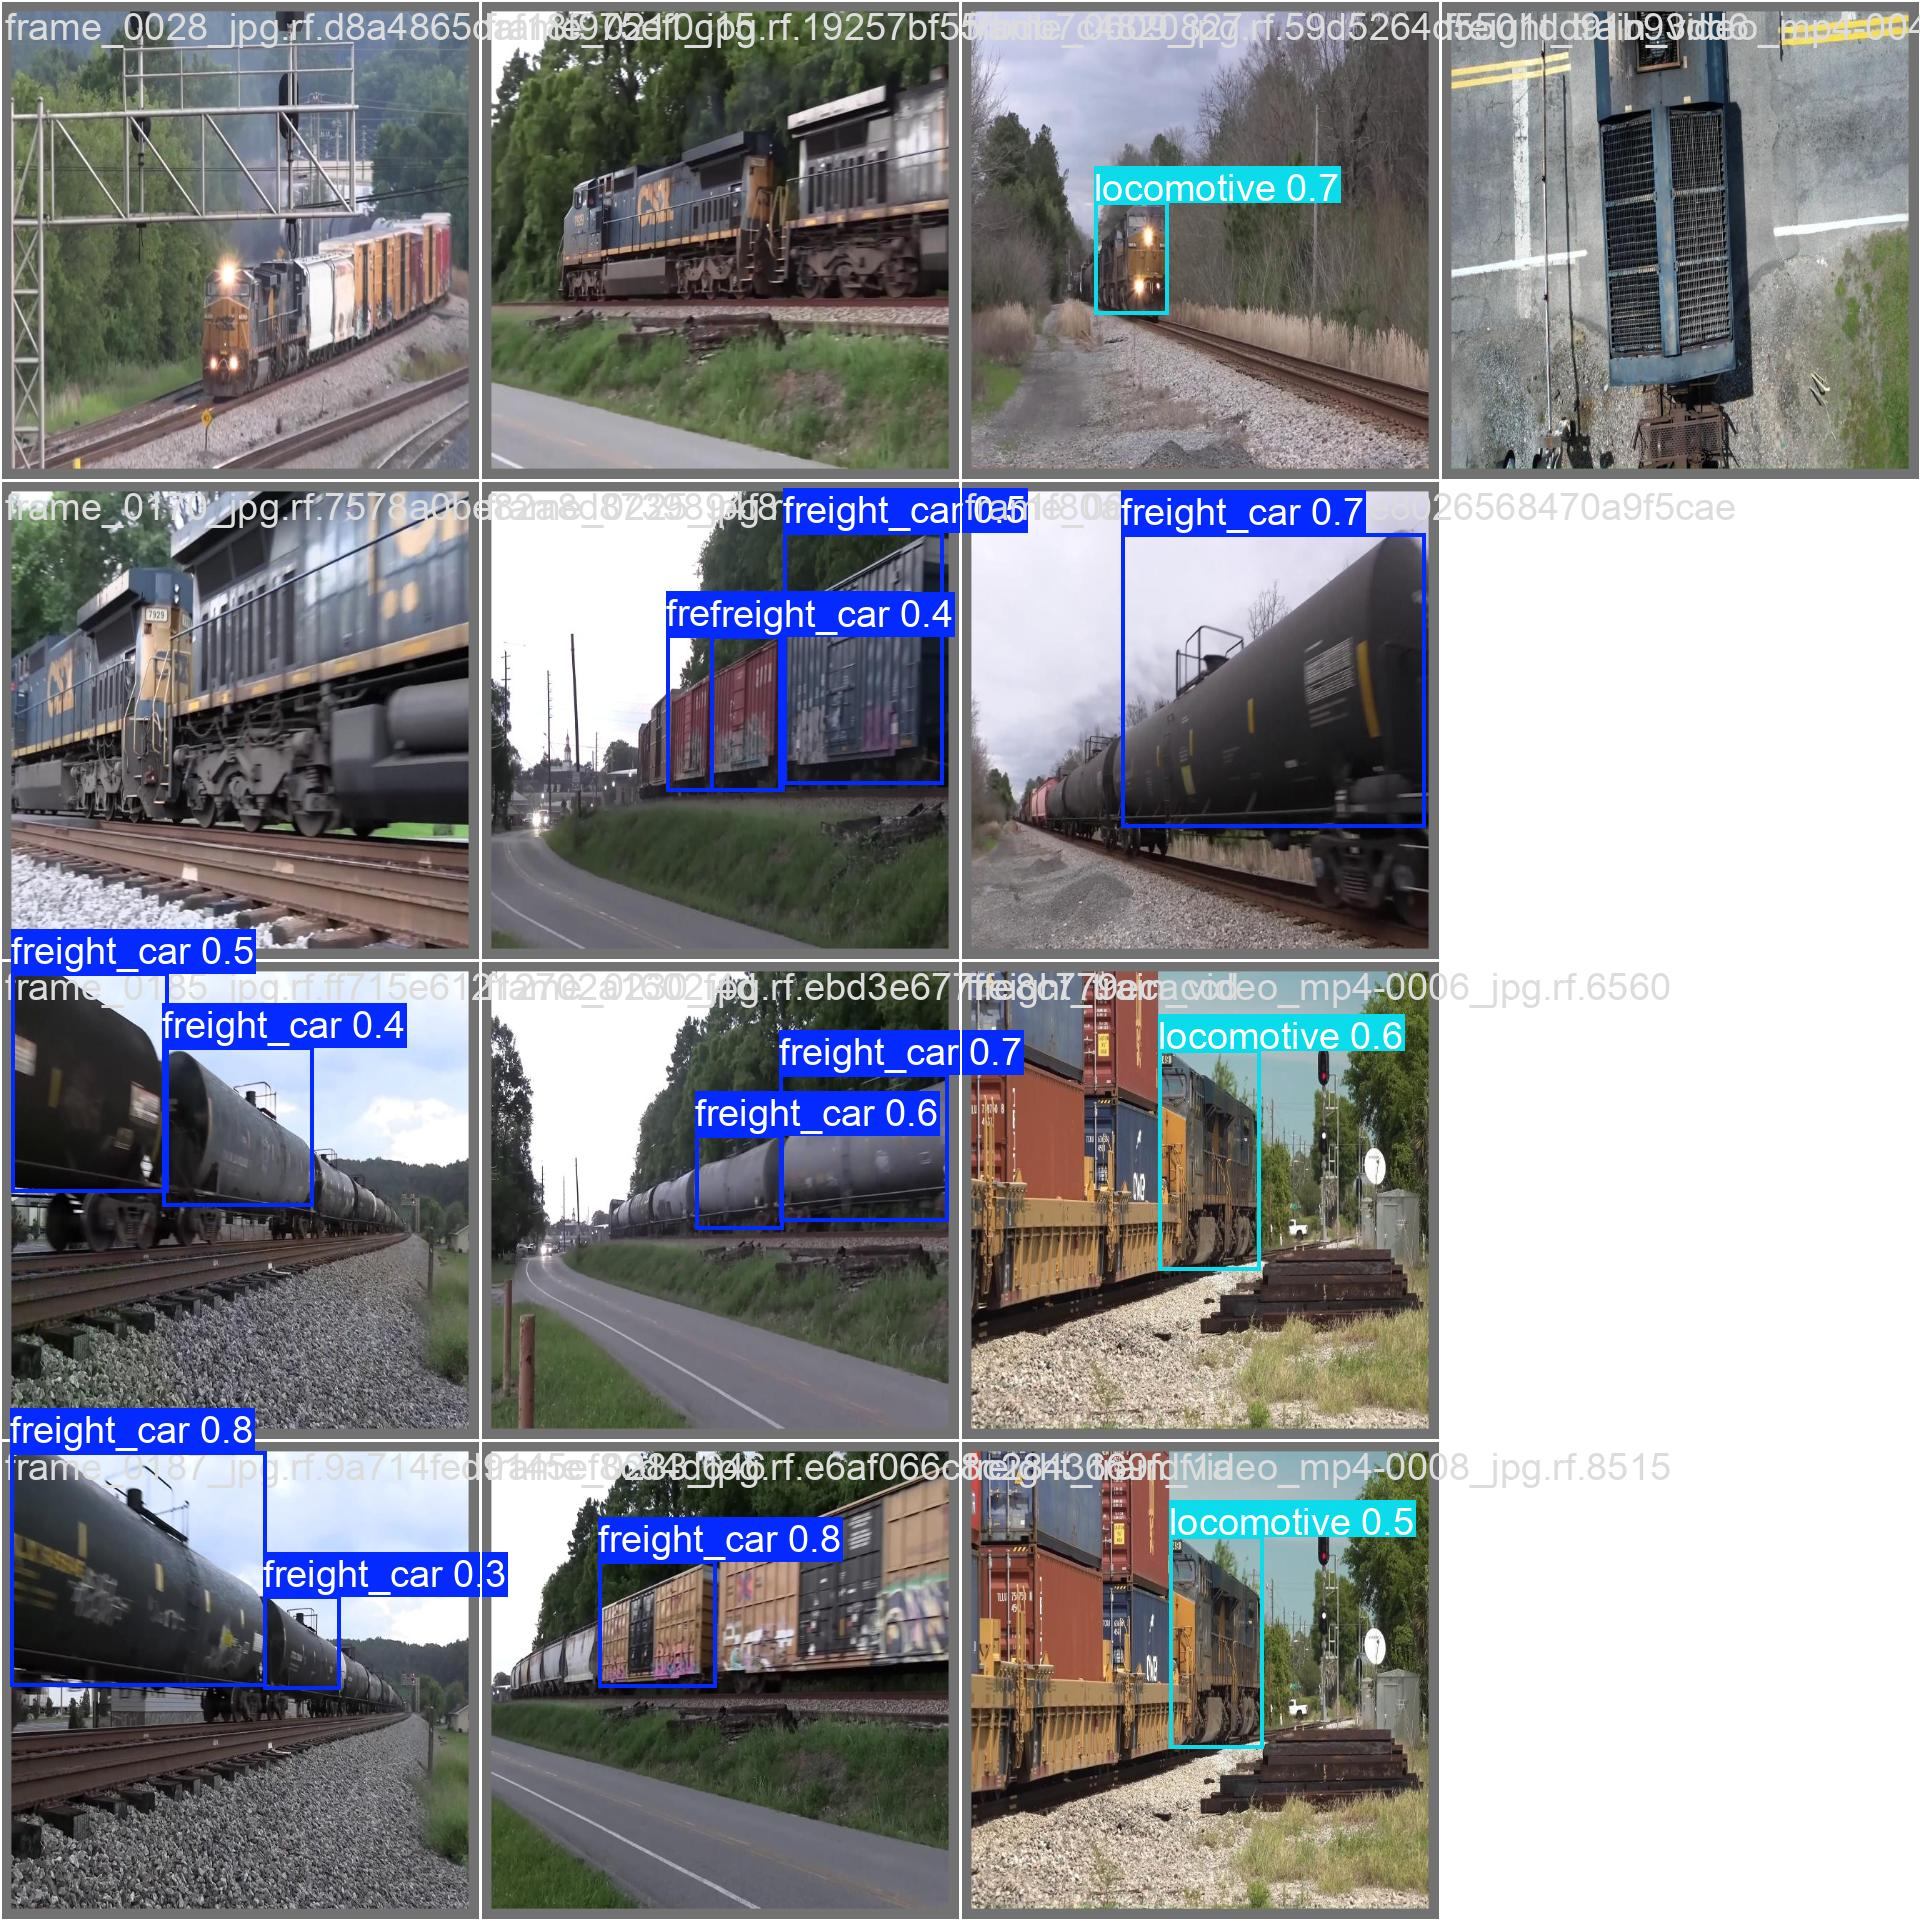

In [42]:
Image("/content/yolo_project_2/train2/val_batch0_pred.jpg")